In [1]:
import pandas as pd
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import gzip as gz
import scipy
from importlib import reload
import glob
import tqdm
import itertools
from scipy.spatial.distance import cdist
import scanpy as sc

import sys
sys.path.append('/Genomics/pritykinlab/dillon/perturbseq/scripts/utils')
import dataloader
import umap_analysis
import reimplementation
import normalization
import adata_utils
from scipy.stats import mannwhitneyu
from scipy import stats

In [2]:
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["lines.markersize"] = 5
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.title_fontsize'] = 15
plt.rcParams['legend.edgecolor'] = 'dimgray'
plt.rcParams['figure.figsize'] = (7,7)

In [3]:
sys.path.append('/Genomics/pritykinlab/dillon/preprocessing_benchmarking/scripts/utils')

import processing_steps

# Panel a

In [195]:
file_ = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/pilot/hvg/SchmidtMarson2022_Resting/aggregated_results.tsv"

In [196]:
df = pd.read_csv(file_, sep='\t')

In [197]:
df['log_dissimilarity_ratio'].value_counts()

 0.017463    3160
-0.053359    3009
 0.019622    2563
-3.459432    2481
 0.034459    2146
             ... 
-0.446772       1
-1.451626       1
-2.452682       1
-2.455685       1
-0.991487       1
Name: log_dissimilarity_ratio, Length: 1011, dtype: int64

In [198]:
df = df[df['num_hvg'] == 4000]

In [199]:
df['CBC'].value_counts()

GGGAGATAGACCGTTT-1    1
TGCGACGTCTCGCAGG-3    1
CATTGAGCATGGTGGA-3    1
CTCCGATTCTAACACG-3    1
TATCGCCGTACTCCCT-3    1
                     ..
ATCGGATCAGGTTCGC-2    1
TGTGGCGCAACCTAAC-2    1
AGAAGTACAGTCGCAC-2    1
CTCGAGGCAGAGGCTA-2    1
TAGATCGTCGAACGGA-4    1
Name: CBC, Length: 29382, dtype: int64

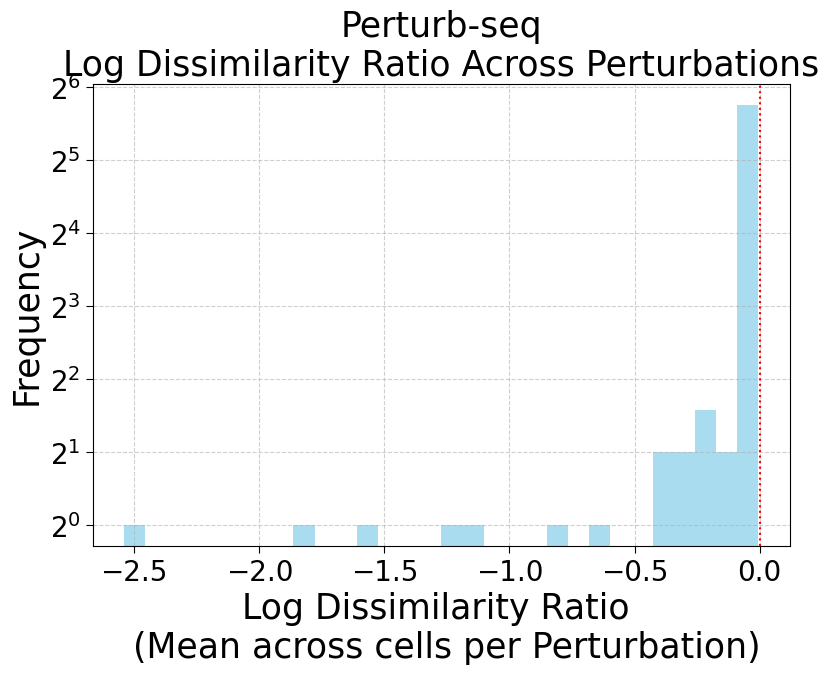

(100.0, 0.0)

In [203]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe
data = df.groupby('label')['log_dissimilarity_ratio'].mean()  # Calculate the mean log dissimilarity ratio per perturbation

# Create the histogram
plt.figure(figsize=(9, 6))  # Set the figure size for better readability
plt.hist(data, bins=30, color='skyblue', alpha=0.7)  # You can adjust the number of bins and color here

# Adding a vertical red dotted line at zero
plt.axvline(x=0, color='red', linestyle='dotted')

# Adding labels and title
plt.xlabel('Log Dissimilarity Ratio \n (Mean across cells per Perturbation)')
plt.ylabel('Frequency')
plt.title('Perturb-seq\nLog Dissimilarity Ratio Across Perturbations')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set log2 scale on y-axis
plt.yscale('log', base=2)

# Show the plot
plt.show()

# Calculate the percentage of points to the left and right of zero
left_percentage = (data < 0).mean() * 100
right_percentage = (data > 0).mean() * 100

left_percentage, right_percentage


# Panel b

In [148]:
file_ = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/pilot/yermanos/aggregated_results.tsv"

In [149]:
df = pd.read_csv(file_, sep='\t')

In [150]:
adata = sc.read_h5ad("yermanos.h5ad")

In [151]:
vc = adata.obs['tcr_cdr3s_aa'].value_counts()
vc = vc[vc >= 5]

In [152]:
labels_to_keep = vc.index

In [153]:
# Filter the DataFrame to remove these labels and ensure the label is not NaN
df = df[df['label'].isin(labels_to_keep)]

In [155]:
df['CBC'].value_counts()

AAACCTGAGAAGGACA-1    1
CGAATGTCAGACGCAA-2    1
CGAGAAGTCTTAACCT-2    1
CGAGAAGGTTCCCTTG-2    1
CGACTTCGTGACGGTA-2    1
                     ..
GGACGTCCAGTCACTA-1    1
GGACATTGTGAGTATA-1    1
GGACAGAGTCTAGCCG-1    1
GGACAAGCAGCCTATA-1    1
TTTGTCAAGTACATGA-2    1
Name: CBC, Length: 1387, dtype: int64

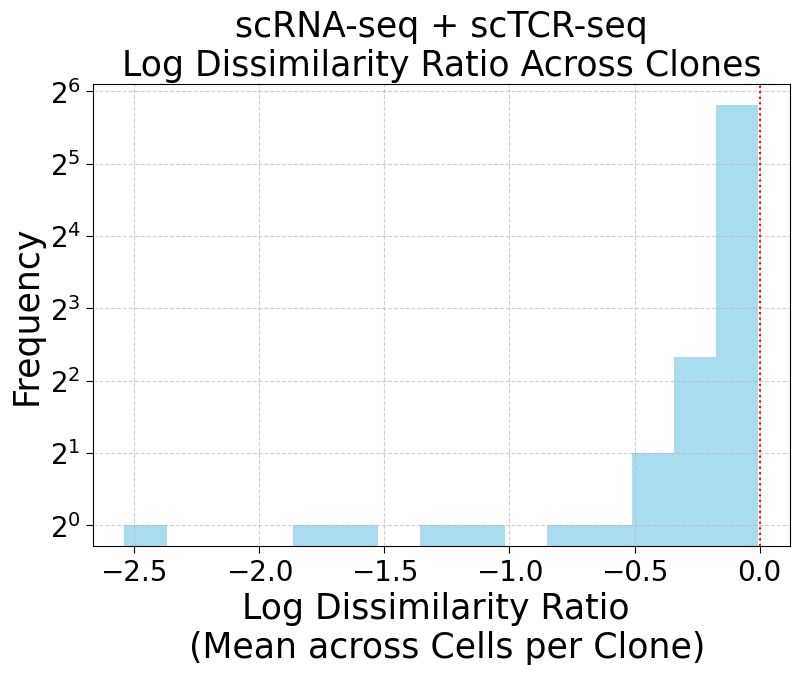

(100.0, 0.0)

In [207]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your dataframe
data = df.groupby('label')['log_dissimilarity_ratio'].mean()  # Calculate the mean log dissimilarity ratio per clone

# Create the histogram
plt.figure(figsize=(9, 6))  # Set the figure size for better readability
plt.hist(data, bins=15, color='skyblue', alpha=0.7)  # You can adjust the number of bins and color here

# Adding a vertical red dotted line at zero
plt.axvline(x=0, color='red', linestyle='dotted')

# Adding labels and title
plt.xlabel('Log Dissimilarity Ratio \n (Mean across Cells per Clone)')
plt.ylabel('Frequency')
plt.title('scRNA-seq + scTCR-seq\nLog Dissimilarity Ratio Across Clones')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Set log2 scale on y-axis
plt.yscale('log', base=2)

# Show the plot
plt.show()

# Calculate the percentage of points to the left and right of zero
left_percentage = (data < 0).mean() * 100
right_percentage = (data > 0).mean() * 100

left_percentage, right_percentage


# Panel c

In [3]:
file_ = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/10x_CITE_seq_pilot/pbmc_10k_protein_v3/aggregated_results.tsv"

In [4]:
df = pd.read_csv(file_, sep='\t')

/tmp/ipykernel_739880/1859743207.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_, sep='\t')


In [5]:
df = df[df['num_hvg'] == 4000]
df = df[df['hvg_norm_combo'] == 'seurat + norm_log_zscore']
df = df[df['num_nn'] == 20]
df = df[df['num_pcs'] == 50]
df['num_hvg'] = df['num_hvg'].apply(lambda x: int(x))  # Convert num_hvg to integer

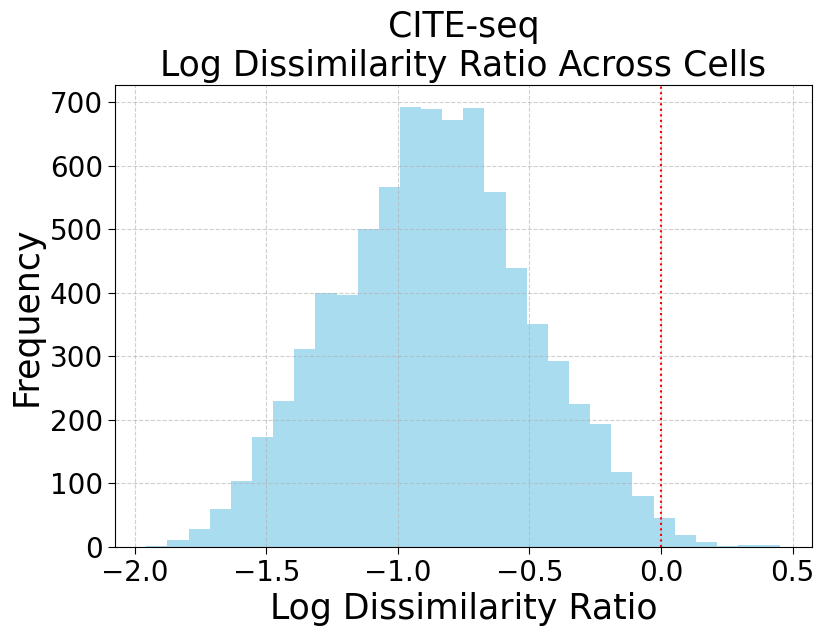

(99.28716904276986, 0.7128309572301426)

In [6]:
import matplotlib.pyplot as plt

data = df['log_dissimilarity_ratio']

# Create the histogram
plt.figure(figsize=(9, 6))  # Set the figure size for better readability
plt.hist(data, bins=30, color='skyblue', alpha=0.7)  # You can adjust the number of bins and color here

# Adding a vertical red dotted line at zero
plt.axvline(x=0, color='red', linestyle='dotted')

# Adding labels and title
plt.xlabel('Log Dissimilarity Ratio')
plt.ylabel('Frequency')
plt.title('CITE-seq\nLog Dissimilarity Ratio Across Cells')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

# Calculate the percentage of points to the left and right of zero
left_percentage = (data < 0).mean() * 100
right_percentage = (data > 0).mean() * 100

left_percentage, right_percentage


# Panel d

In [208]:
file_dir = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/pilot/hvg/*/aggregated_results.tsv"

In [210]:
# Calculate the number of values less than 0
num_values_less_than_zero = (aggregated_data['log_dissimilarity_ratio'] < 0).sum()

# Calculate the total number of values
total_values = len(aggregated_data['log_dissimilarity_ratio'])

# Calculate the percentage of values less than 0
percentage_less_than_zero = (num_values_less_than_zero / total_values) * 100

print(f"Percentage of values less than 0: {percentage_less_than_zero:.2f}%")


Percentage of values less than 0: 100.00%


In [163]:
len(aggregated_data['dataset_name'].value_counts().index)

13

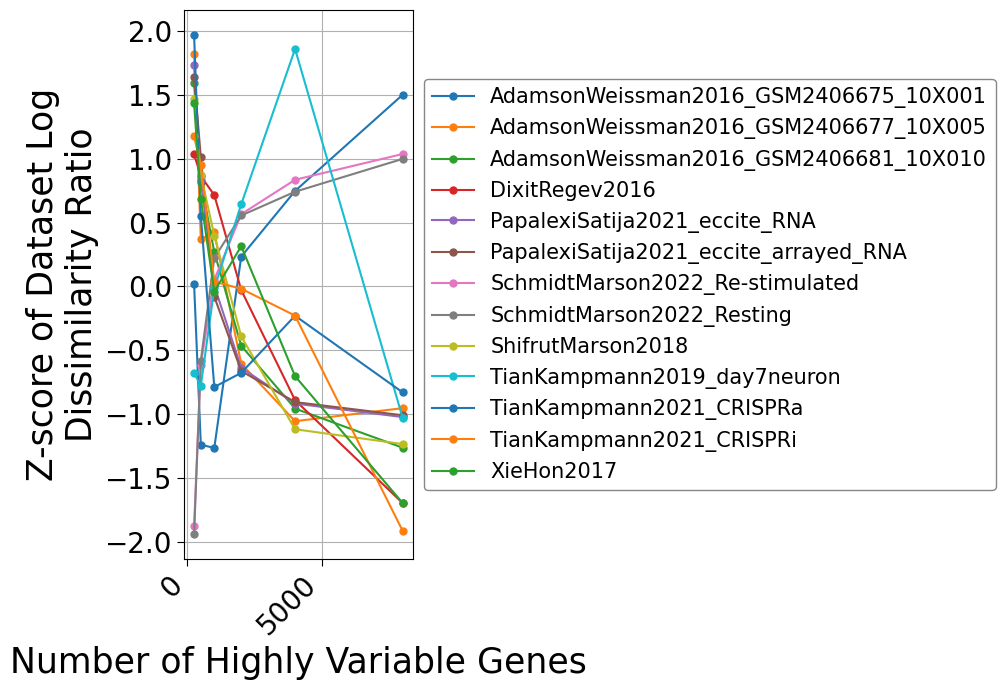

In [212]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.stats import zscore

# Initialize an empty DataFrame to store aggregated results
aggregated_data = pd.DataFrame()

for file_ in glob.glob(file_dir):  # Assuming file_dir is defined with your path
    dataset_name = file_.split('/')[-2]  # Extracting dataset name from the file path
    df = pd.read_csv(file_, sep='\t')
    df = df[df['num_hvg'] != 'max_num_hvg']
    df = df[['log_dissimilarity_ratio', 'label', 'num_hvg', 'num_nn', 'num_pcs']]
    df['num_hvg'] = df['num_hvg'].apply(lambda x: int(x))  # Convert num_hvg to integer
    
    # Calculate the mean log dissimilarity ratio per label
    mean_per_label = df.groupby(['label', 'num_hvg'])['log_dissimilarity_ratio'].mean().reset_index()
    
    # Calculate the mean across all labels for each 'num_hvg'
    mean_values = mean_per_label.groupby('num_hvg')['log_dissimilarity_ratio'].mean().reset_index()
    
    # Append dataset name to the DataFrame
    mean_values['dataset_name'] = dataset_name
    
    # Append to the aggregated DataFrame
    aggregated_data = pd.concat([aggregated_data, mean_values[['dataset_name', 'num_hvg', 'log_dissimilarity_ratio']]], ignore_index=True)

aggregated_data['zscore_log_dissimilarity_ratio'] = aggregated_data.groupby('dataset_name')['log_dissimilarity_ratio'].transform(lambda x: zscore(x, nan_policy='omit'))

# Plotting all datasets on one plot with normalized data
plt.figure(figsize=(10, 7))
for name, group in aggregated_data.groupby('dataset_name'):
    plt.plot(group['num_hvg'], group['zscore_log_dissimilarity_ratio'], marker='o', linestyle='-', label=name)

# Adjust x-axis labels to display on two lines
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Highly Variable Genes')

# Set y-axis label
plt.ylabel('Z-score of Dataset Log\nDissimilarity Ratio')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Grid and show plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


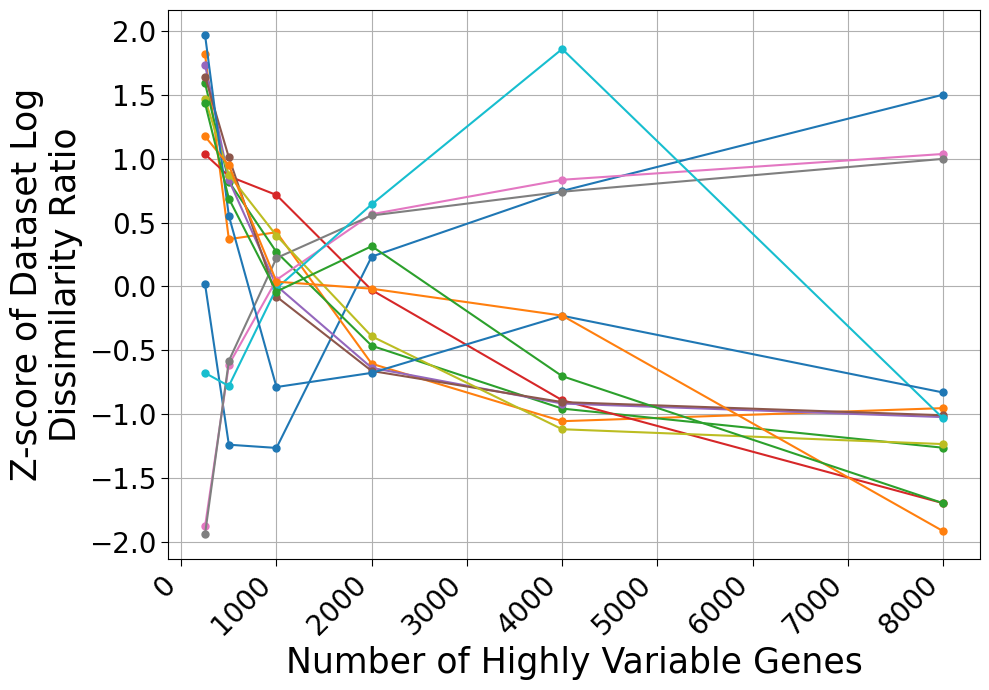

In [214]:
# Plotting all datasets on one plot with normalized data
plt.figure(figsize=(10, 7))
for name, group in aggregated_data.groupby('dataset_name'):
    plt.plot(group['num_hvg'], group['zscore_log_dissimilarity_ratio'], marker='o', linestyle='-', label=name)

# Adjust x-axis labels to display on two lines
plt.xticks(rotation=45, ha='right')
plt.xlabel('Number of Highly Variable Genes')

# Set y-axis label
plt.ylabel('Z-score of Dataset Log\nDissimilarity Ratio')


# Grid and show plot
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


# Panel e

In [217]:
file_dir = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/pilot/pc/*/aggregated_results.tsv"

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.stats import zscore

def make_plots(file_dir):
    # Initialize an empty DataFrame to store aggregated results
    aggregated_data = pd.DataFrame()

    for file_ in glob.glob(file_dir):  # Assuming file_dir is defined with your path
        dataset_name = file_.split('/')[-2]  # Extracting dataset name from the file path
        df = pd.read_csv(file_, sep='\t')
        df = df[df['num_hvg'] != 'max_num_hvg']
        df = df[['log_dissimilarity_ratio', 'label', 'hvg_norm_combo', 'num_hvg', 'num_nn', 'num_pcs']]
        df['num_hvg'] = df['num_hvg'].apply(lambda x: int(x))  # Convert num_hvg to integer
        df = df[df['num_hvg'] == 4000]
        df = df[df['hvg_norm_combo'] == 'seurat + norm_log_zscore']
        # Calculate the mean log dissimilarity ratio per label
        mean_per_label = df.groupby(['label', 'num_pcs'])['log_dissimilarity_ratio'].mean().reset_index()
        
        # Calculate the mean across all labels for each 'num_pcs'
        mean_values = mean_per_label.groupby('num_pcs')['log_dissimilarity_ratio'].mean().reset_index()
        
        # Append dataset name to the DataFrame
        mean_values['dataset_name'] = dataset_name
        
        # Append to the aggregated DataFrame
        aggregated_data = pd.concat([aggregated_data, mean_values[['dataset_name', 'num_pcs', 'log_dissimilarity_ratio']]], ignore_index=True)
    
    # Calculate the Z-score for 'log_dissimilarity_ratio' within each dataset
    aggregated_data['zscore_log_dissimilarity_ratio'] = aggregated_data.groupby('dataset_name')['log_dissimilarity_ratio'].transform(lambda x: zscore(x, nan_policy='omit'))
    
    # Calculate the number of values less than 0
    num_values_less_than_zero = (aggregated_data['log_dissimilarity_ratio'] < 0).sum()
    
    # Calculate the total number of values
    total_values = len(aggregated_data['log_dissimilarity_ratio'])
    
    # Calculate the percentage of values less than 0
    percentage_less_than_zero = (num_values_less_than_zero / total_values) * 100
    
    print(f"Percentage of values less than 0: {percentage_less_than_zero:.2f}%")
    
    # Plotting all datasets on one plot with normalized data
    plt.figure(figsize=(10, 7))
    for name, group in aggregated_data.groupby('dataset_name'):
        plt.plot(group['num_pcs'], group['zscore_log_dissimilarity_ratio'], marker='o', linestyle='-', label=name)
    
    # Adjust x-axis labels to display on two lines
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Number of PCs')
    
    # Set y-axis label
    plt.ylabel('Z-score of Dataset Log\nDissimilarity Ratio')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Grid and show plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()
    
    
    # Plotting all datasets on one plot with normalized data
    plt.figure(figsize=(10, 7))
    for name, group in aggregated_data.groupby('dataset_name'):
        plt.plot(group['num_pcs'], group['zscore_log_dissimilarity_ratio'], marker='o', linestyle='-', label=name)
    
    # Adjust x-axis labels to display on two lines
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Number of PCs')
    
    # Set y-axis label
    plt.ylabel('Z-score of Dataset Log\nDissimilarity Ratio')
        
    # Grid and show plot
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.show()


# Usage example
# make_plots('/path/to/your/files/*')


Percentage of values less than 0: 96.15%


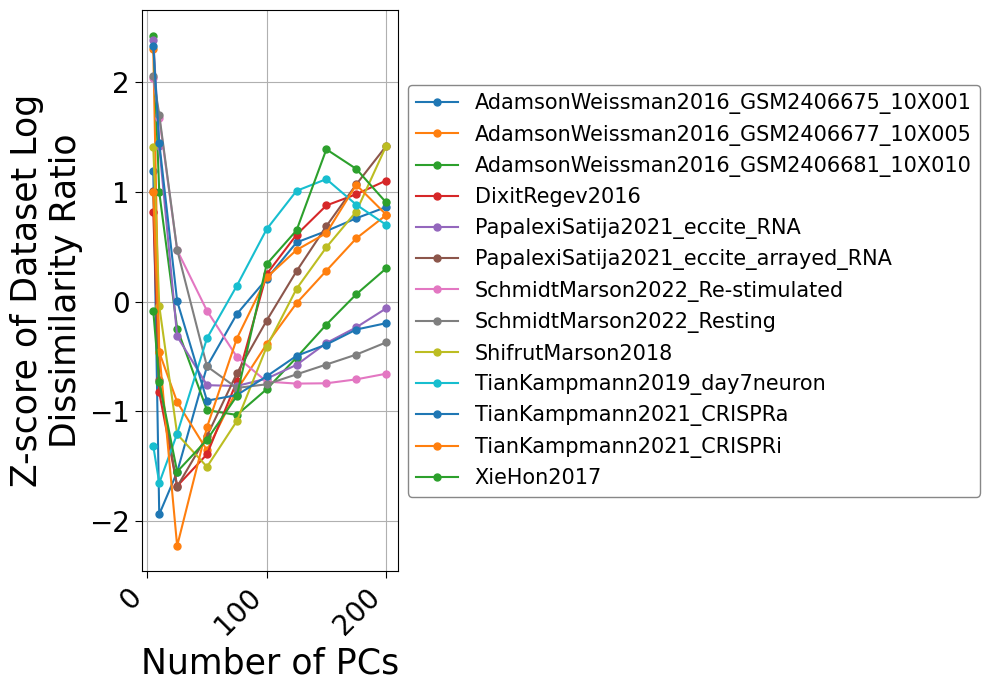

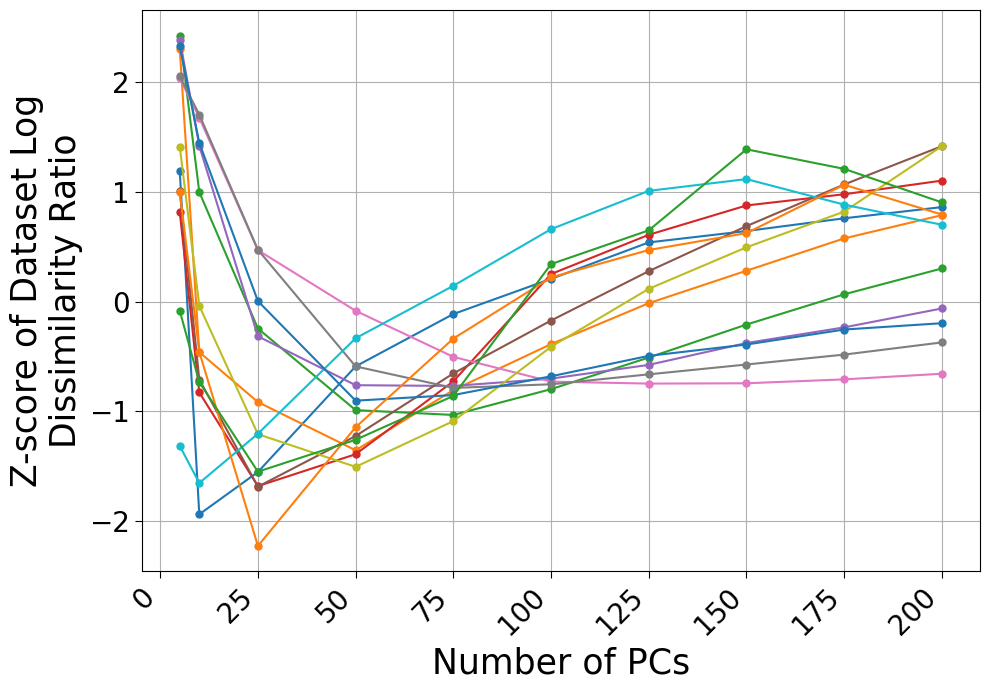

In [8]:
# Perturb-seq 
file_dir = "/Genomics/pritykinlab/dillon/preprocessing_benchmarking/results/pilot/pc/*/aggregated_results.tsv"
make_plots(file_dir)